In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import emulator

In [2]:
cosmo, hod = 1, 1
statistic = 'upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''

gptag = traintag + errtag + tag
res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

emu = emulator.Emulator(statistic, training_dir, gperr=gperr, hyperparams=hyperparams)
emu.build()

Loading training data
Nparams: 18
Rebuilding emulators


In [30]:
print(emu.gperr)

[0.00027332 0.00138898 0.00474205 0.00854407 0.01645155 0.02912254
 0.05004355 0.1052322  0.18863659]


### Read in upf chain

In [33]:
chaintag = 'upf_c4h4_fenv_sigma8_long_nolog'
chain_fn = f'../chains/chains_{chaintag}.h5'
f = h5py.File(chain_fn, 'r')

In [34]:
print(f.keys())
print(f.attrs.keys())

<KeysViewHDF5 ['chain', 'lnprob']>
<KeysViewHDF5 ['cosmo', 'errtag', 'hod', 'log', 'mean', 'mean_acceptance_fraction', 'mean_autocorr_time', 'multi', 'nburn', 'nsteps', 'nwalkers', 'param_names', 'statistic', 'tag', 'testtag', 'traintag', 'true_values']>


In [35]:
chain_dset = f['chain']
lnprob_dset = f['lnprob']
param_names = f.attrs['param_names']
true_values = f.attrs['true_values']

In [36]:
nwalkers, nchain, ndim = chain_dset.shape

In [37]:
print(param_names)
print(chain_dset.shape)

['f_env' 'sigma_8']
(100, 1000, 2)


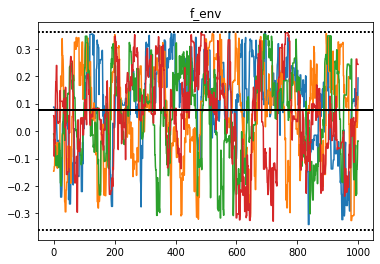

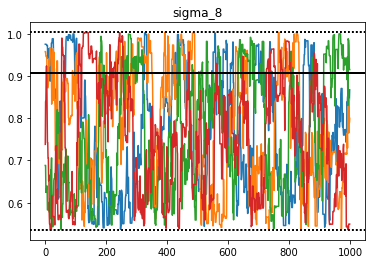

In [39]:
for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    #for j in range(nwalkers):
    for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')

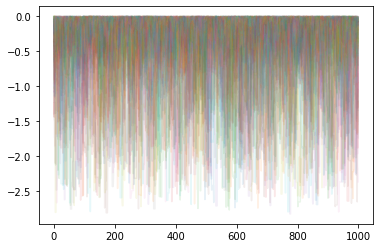

In [10]:
plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=0.1)

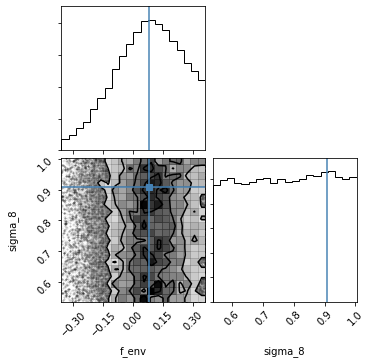

In [11]:
chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

In [11]:
f.close()

### Read in wp chain

In [31]:
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''

gptag = traintag + errtag + tag
res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
print(gperr)

[0.01204897 0.01374562 0.01758566 0.02469664 0.03051155 0.02026336
 0.0174491  0.02324893 0.05174518]


In [25]:
chaintag = 'wp_c4h4_fenv_sigma8_short'
chain_fn = f'../chains/chains_{chaintag}.h5'
f = h5py.File(chain_fn, 'r')

In [26]:
chain_dset = f['chain']
lnprob_dset = f['lnprob']
param_names = f.attrs['param_names']
true_values = f.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

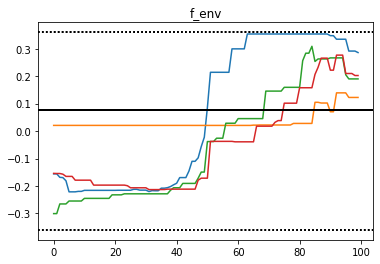

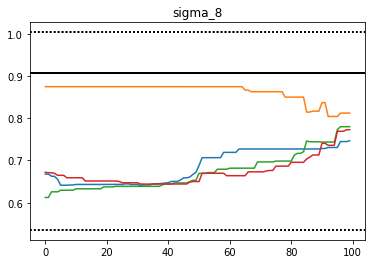

In [27]:
for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')

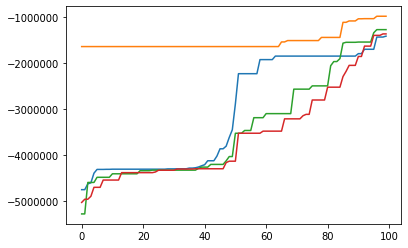

In [28]:
plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)

In [29]:
f.close()